In [41]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms

import searchnets
from searchnets.utils.dataset import VisSearchDataset

In [2]:
model = searchnets.nets.alexnet.build(pretrained=True)

In [3]:
activations = {}

def hook_fn(module, inp, out):
    activations[module] = out

def register_forward_hooks(net):
    modules = [module for module in net.modules() if type(module) != nn.Sequential and type(module) != type(net)]
    for module in modules:
        module.register_forward_hook(hook_fn)

In [4]:
register_forward_hooks(model)

In [5]:
MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]

In [6]:
normalize = transforms.Normalize(mean=MEAN,
                                 std=STD)

In [7]:
batch_size = 64
num_workers = 32

In [9]:
csv_file = Path('~/Documents/repos/L2M/visual-search-nets/data/visual_search_stimuli/alexnet_RVvGV/alexnet_RVvGV_finetune_split.csv')
csv_file = csv_file.expanduser()

In [10]:
trainset = VisSearchDataset(csv_file=csv_file,
                        split='test',
                        transform=transforms.Compose(
                            [transforms.ToTensor(), normalize]
                        ))

train_loader = DataLoader(trainset, batch_size=batch_size,
                          shuffle=True, num_workers=num_workers,
                          pin_memory=True)

In [11]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [13]:
model.to(device);

In [36]:
mn_act_vis_search = {k: [] for k in activations.keys()}
std_act_vis_search = {k: [] for k in activations.keys()}

In [37]:
total = int(np.ceil(len(trainset) / batch_size))
pbar = tqdm(train_loader)
for i, (batch_x, batch_y) in enumerate(pbar):
    pbar.set_description(f'batch {i} of {total}')
    batch_x, batch_y = batch_x.to(device), batch_y.to(device)
    output = model(batch_x)
    for k, v in activations.items():
        v_arr = v.detach().cpu().numpy()
        mn_act_vis_search[k].append(v_arr.mean())
        std_act_vis_search[k].append(v_arr.std())







  0%|          | 0/13 [00:00<?, ?it/s]




batch 0 of 13:   0%|          | 0/13 [00:01<?, ?it/s]




batch 0 of 13:   8%|▊         | 1/13 [00:02<00:29,  2.44s/it]




batch 1 of 13:   8%|▊         | 1/13 [00:02<00:29,  2.44s/it]




batch 1 of 13:  15%|█▌        | 2/13 [00:02<00:19,  1.78s/it]




batch 2 of 13:  15%|█▌        | 2/13 [00:02<00:19,  1.78s/it]




batch 2 of 13:  23%|██▎       | 3/13 [00:02<00:13,  1.32s/it]




batch 3 of 13:  23%|██▎       | 3/13 [00:02<00:13,  1.32s/it]




batch 3 of 13:  31%|███       | 4/13 [00:03<00:08,  1.01it/s]




batch 4 of 13:  31%|███       | 4/13 [00:03<00:08,  1.01it/s]




batch 4 of 13:  38%|███▊      | 5/13 [00:03<00:06,  1.31it/s]




batch 5 of 13:  38%|███▊      | 5/13 [00:03<00:06,  1.31it/s]




batch 5 of 13:  46%|████▌     | 6/13 [00:03<00:04,  1.65it/s]




batch 6 of 13:  46%|████▌     | 6/13 [00:03<00:04,  1.65it/s]




batch 6 of 13:  54%|█████▍    | 7/13 [00:03<00:02,  2.03it/s]




batch 7 of 13:  54%|█████▍    | 7/1

In [21]:
imagenet_root = Path('~/Documents/data/imagenet')
imagenet_root = imagenet_root.expanduser()
imagenet_data = torchvision.datasets.ImageNet(imagenet_root,
                                              transform=transforms.Compose([
                                                  transforms.RandomResizedCrop(224),
                                                  transforms.RandomHorizontalFlip(),
                                                  transforms.ToTensor(),
                                                  normalize,
                                              ]))
imagenet_loader = torch.utils.data.DataLoader(imagenet_data,
                                              batch_size=batch_size,
                                              shuffle=True,
                                              num_workers=num_workers)

In [38]:
mn_act_imagenet = {k: [] for k in activations.keys()}
std_act_imagenet = {k: [] for k in activations.keys()}

In [42]:
total = int(np.ceil(len(imagenet_data) / batch_size))
pbar = tqdm(imagenet_loader)
for i, (batch_x, batch_y) in enumerate(pbar):
    pbar.set_description(f'batch {i} of {total}')
    batch_x, batch_y = batch_x.to(device), batch_y.to(device)
    output = model(batch_x)
    for k, v in activations.items():
        v_arr = v.detach().cpu().numpy()
        mn_act_imagenet[k].append(v_arr.mean())
        std_act_imagenet[k].append(v_arr.std())
    if i > 13:
        break







  0%|          | 0/20019 [00:00<?, ?it/s]





batch 0 of 20019:   0%|          | 0/20019 [00:02<?, ?it/s]





batch 0 of 20019:   0%|          | 1/20019 [00:03<19:17:57,  3.47s/it]





batch 1 of 20019:   0%|          | 1/20019 [00:03<19:17:57,  3.47s/it]





batch 1 of 20019:   0%|          | 2/20019 [00:03<14:10:28,  2.55s/it]





batch 2 of 20019:   0%|          | 2/20019 [00:03<14:10:28,  2.55s/it]





batch 2 of 20019:   0%|          | 3/20019 [00:04<10:22:06,  1.86s/it]





batch 3 of 20019:   0%|          | 3/20019 [00:04<10:22:06,  1.86s/it]





batch 3 of 20019:   0%|          | 4/20019 [00:04<7:40:56,  1.38s/it] 





batch 4 of 20019:   0%|          | 4/20019 [00:04<7:40:56,  1.38s/it]





batch 4 of 20019:   0%|          | 5/20019 [00:04<5:46:08,  1.04s/it]





batch 5 of 20019:   0%|          | 5/20019 [00:04<5:46:08,  1.04s/it]





batch 5 of 20019:   0%|          | 6/20019 [00:04<4:25:46,  1.26it/s]





batch 6 of 20019:   0%|          | 6/20019 [00:04<

In [23]:
for k, v in activations.items():
    print("mean: ", v.detach().cpu().numpy().mean(), "std: ", v.detach().cpu().numpy().std())

mean:  0.45411605 std:  1.1659955
mean:  0.45411605 std:  1.1659955
mean:  1.3188509 std:  1.9331664
mean:  0.5507456 std:  1.7578969
mean:  0.5507456 std:  1.7578969
mean:  1.6835401 std:  3.0915618
mean:  0.5712242 std:  1.8779216
mean:  0.5712242 std:  1.8779216
mean:  0.53353333 std:  1.6088241
mean:  0.53353333 std:  1.6088241
mean:  0.2399061 std:  0.98930407
mean:  0.2399061 std:  0.98930407
mean:  0.7343287 std:  1.7397301
mean:  0.7343287 std:  1.7397301
mean:  0.7363522 std:  2.5793045
mean:  0.8624805 std:  2.0159578
mean:  0.8624805 std:  2.0159578
mean:  0.8631103 std:  2.9651198
mean:  0.29794914 std:  1.1524063
mean:  0.29794914 std:  1.1524063
mean:  0.00025566245 std:  3.538064


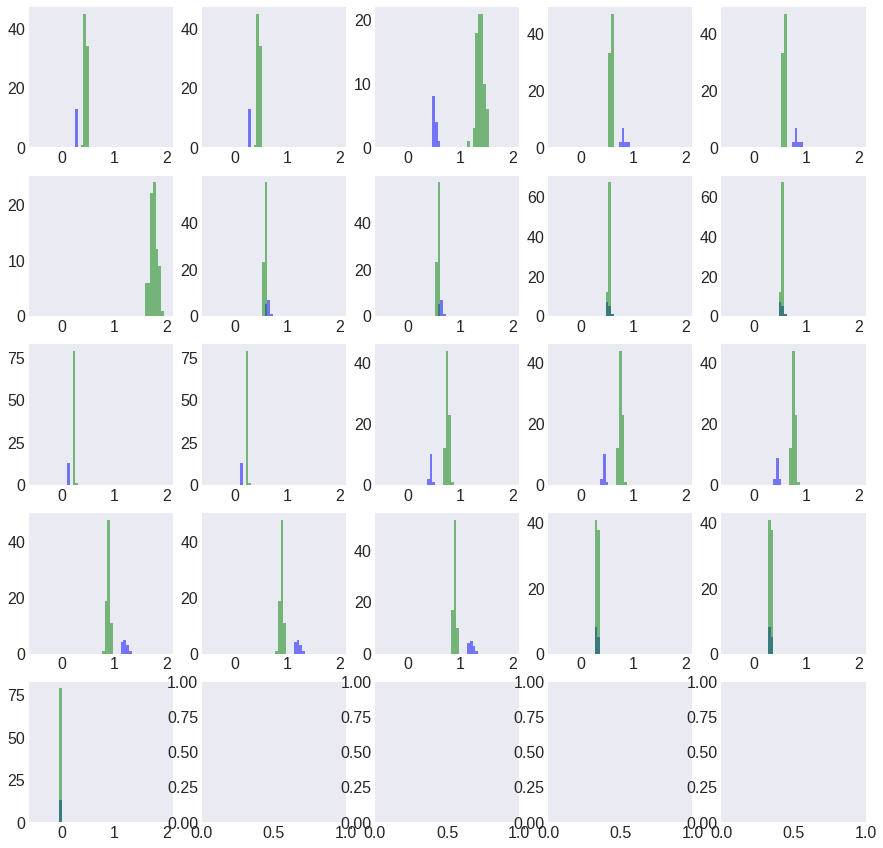

In [52]:
bins = np.linspace(-0.5, 2, 50)

fig, ax = plt.subplots(5, 5)
fig.set_size_inches(15, 15)
ax = ax.ravel()
for i, (k, v) in enumerate(mn_act_vis_search.items()):
    ax[i].hist(v, bins, alpha=0.5, color='blue', label='vis search')
for i, (k, v) in enumerate(mn_act_imagenet.items()):
    ax[i].hist(v, bins, alpha=0.5, color='green', label='imagenet')


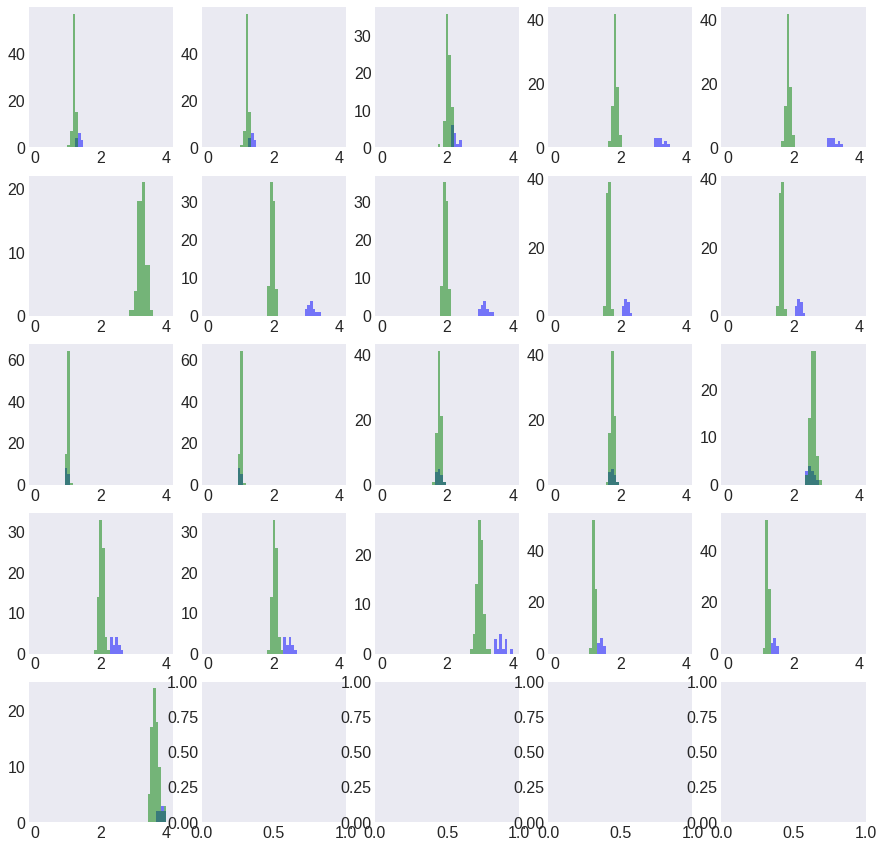

In [56]:
bins = np.linspace(0, 4, 50)

fig, ax = plt.subplots(5, 5)
fig.set_size_inches(15, 15)
ax = ax.ravel()
for i, (k, v) in enumerate(std_act_vis_search.items()):
    ax[i].hist(v, bins, alpha=0.5, color='blue', label='vis search')
for i, (k, v) in enumerate(std_act_imagenet.items()):
    ax[i].hist(v, bins, alpha=0.5, color='green', label='imagenet')